In [3]:
### Distributed Bragg Reflector (1d photonic crystal)

In [1]:
# Load modules
include("TMMOptics.jl")
include("RIdb.jl")
include("nplot.jl")
include("pbgplot_v1.jl")
using Main.TMMOptics
using Main.RIdb: air, dummy
using PyPlot

In [2]:
# Define beam
λi = 200 # intial wavelength [nm]
λf = 5000 # final wavelength [nm]
λ = LinRange(λi, λf, λf-λi) 
λ0 = 700. # reference wavelength
θi = 0 # intial angle of incidence [degree]
θf = 90 # final angle of incidence [degree]
θ = LinRange(0, 90, θf-θi)
beam = PlaneWave(λ, λ0, θ);

In [3]:
# Define type of layers with their indexes of refraction and thicknesses
l0 = Geometrical(air(beam.λ), 0.)
l1 = Optical(dummy(beam.λ, 1.45, 0.), 1/4.)
l2 = Optical(dummy(beam.λ, 3.45, 0.), 1/4.);

In [4]:
# Sequence of materials: elements represent the index position below in the structure (surface down to substrate)
nseq = [l0 l1 l2 l1 l2 l1 l2 l1 l2 l1 l2 l0];

In [5]:
# calculation of the electromagnetic field profile: yes (1) or no (0)
emfflag = 1;
# subdivision of each layer for the calculation of the EMF
h = 10;

In [6]:
# calculation of the photonic dispersion: yes (1) or no (0)
pbgflag = 1;

In [7]:
# Perform computation
results = thinfilmoptics(beam, nseq, emfflag, h, pbgflag);

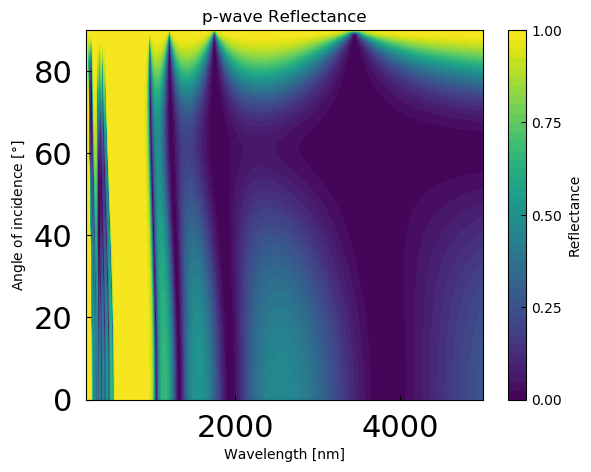

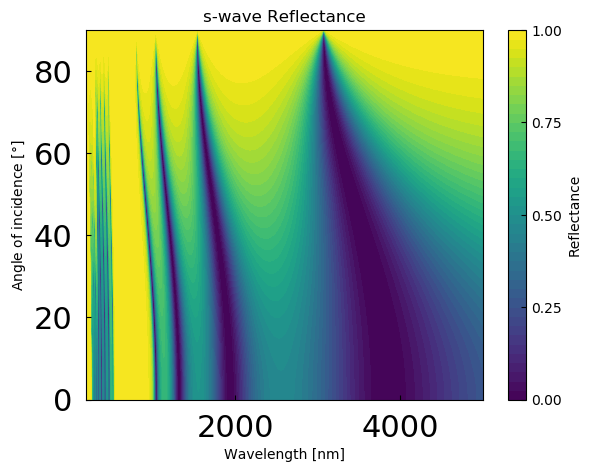

PyObject Text(28,0.5,'Angle of incidence [$\\degree$]')

In [8]:
# plot the R, T and A spectra
figure()
title("p-wave Reflectance")
c1 = contourf(λ, θ, Matrix(results.Spectra.Rp'), 40)
cb1_tags = LinRange(0, 1, 5)
cb1 = colorbar(c1, ticks=cb1_tags)
cb1[:set_label]("Reflectance")
ax1 = gca()
ax1[:tick_params](which="both", direction="in", pad=10, labelsize=22) # ticks offset
axis("tight")
xlabel("Wavelength [nm]")
ylabel(L"Angle of incidence [$\degree$]")
figure()
title("s-wave Reflectance")
c2 = contourf(λ, θ, Matrix(results.Spectra.Rs'), 40)
cb2_tags = LinRange(0, 1, 5)
cb2 = colorbar(c2, ticks=cb2_tags)
cb2[:set_label]("Reflectance")
ax2 = gca()
ax2[:tick_params](which="both", direction="in", pad=10, labelsize=22) # ticks offset
axis("tight")
xlabel("Wavelength [nm]")
ylabel(L"Angle of incidence [$\degree$]")

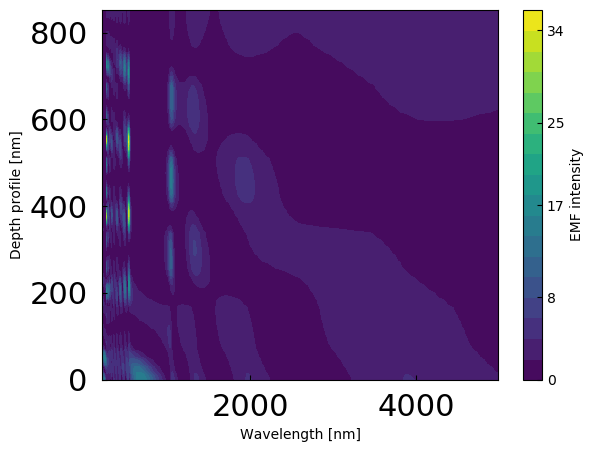

PyObject Text(24,0.5,'Depth profile [nm]')

In [9]:
# plot the EMF pattern for normal incidence
emfieldp = Matrix(results.Field.emfp[:,1,:]') # surface plots cannot handle Adjoint yet
figure()
c3 = contourf(λ, vec(results.Misc.ℓ), emfieldp, 20)
cb3_tags = floor.(LinRange(minimum(emfieldp), maximum(emfieldp), 5))
cb3 = colorbar(c3, ticks=cb3_tags)
cb3[:set_label]("EMF intensity")
ax3 = gca()
ax3[:tick_params](which="both", direction="in", pad=10, labelsize=22) # ticks offset
axis("tight")
xlabel("Wavelength [nm]")
ylabel("Depth profile [nm]")

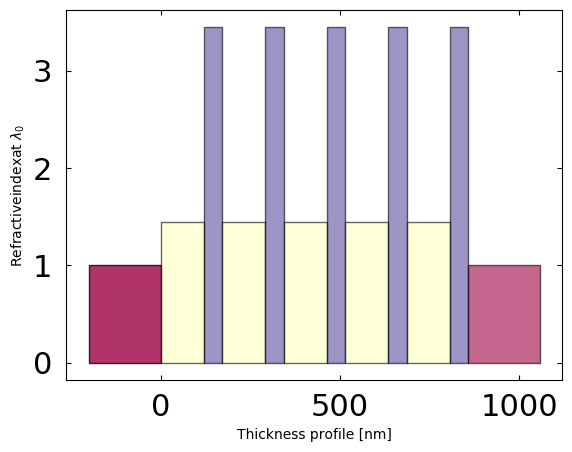

In [10]:
# plot the refractive index profile
nplot(beam.λ, beam.θ, beam.λ0, results.Misc.d, results.Misc.ℓ, results.Field.emfp, results.Misc.nλ0, nseq)

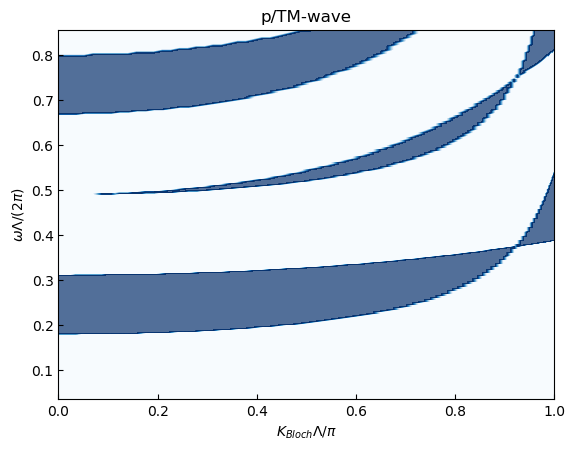

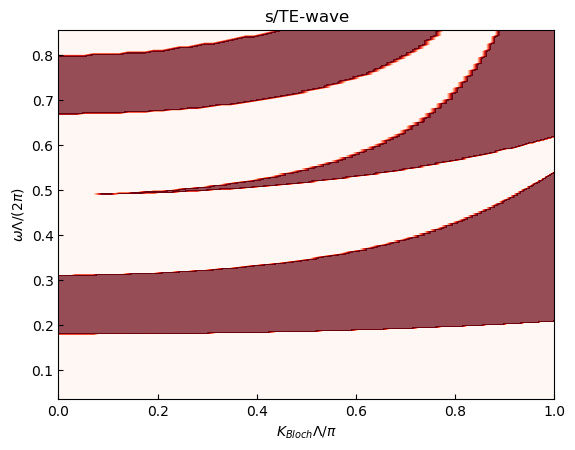

PyObject Text(0.5,26.4,'$K_{Bloch}\\Lambda/\\pi$')

In [11]:
# plot the photonic dispersion with custom function
pbgplot(λ, θ, results.Misc.d, results.Spectra.Rp, results.Spectra.Rs, results.Bloch.κp, results.Bloch.κs)

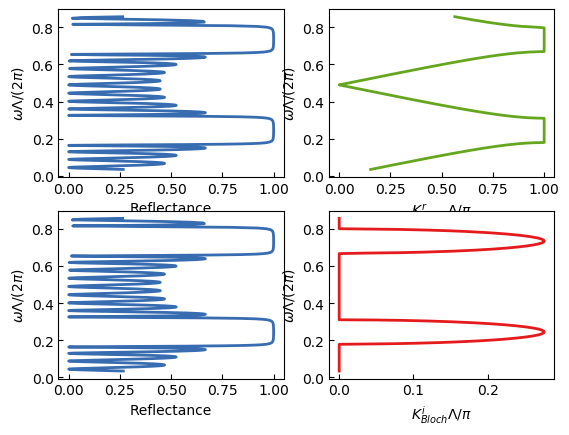

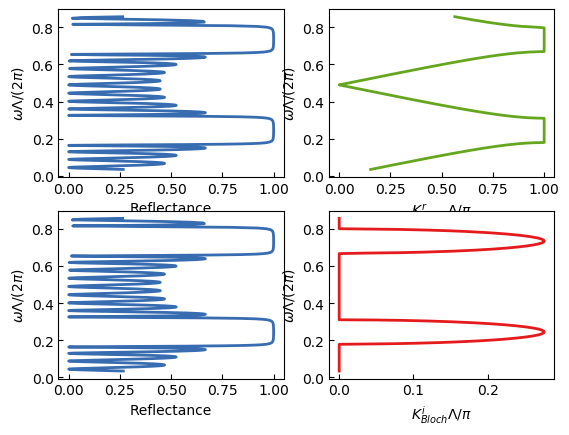

PyObject Text(0.5,31.9,'$K^{i}_{Bloch}\\Lambda/\\pi$')

In [12]:
# plot the band gap for normal incidence
pbgplot(λ, [θ[1]], results.Misc.d, results.Spectra.Rp[:,1], results.Spectra.Rs[:,1], results.Bloch.κp[:,1], results.Bloch.κs[:,1])